In [25]:
# import numpy and pandas

import pandas as pd
import numpy as np

In [26]:
# import visualization libraries and set %matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Read in the csv file as a dataframe called df

df = pd.read_csv('911.csv')

In [28]:
# Check the info() of the df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [29]:
# Chech the head of the dataframe

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [30]:
# What are the top zipcodes for 911 calls?
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [31]:
# What are the top 5 townships (twp) for 911 calls?

df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [32]:
# Take a look at the 'title' column , how many unique codes are there?

df['title'].nunique()

110

In [33]:
# In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value. For example , if the title column value is EMS:BACK PAINS/INJURY, the Reason column value would be EMS.

df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df.Reason

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [34]:
# What is the most common Reason for a 911 call based off of this new column?

df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

C:\Users\nchatziminas.BYTE\AppData\Local\Temp\ipykernel_2204\1900776833.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reason', data=df, palette='viridis' , legend=False)


<Axes: xlabel='Reason', ylabel='count'>

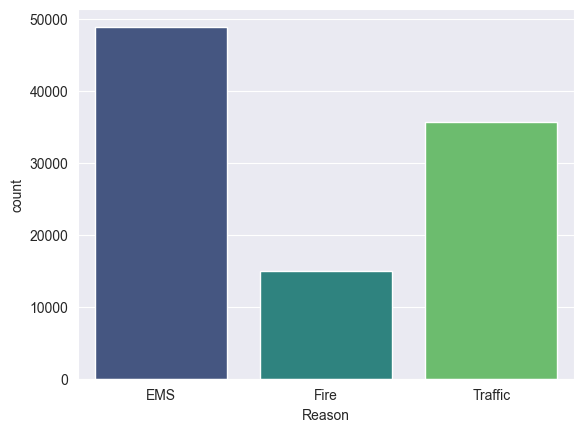

In [36]:
# Now use seaborn to create a countplot of 911 calls by reason

sns.countplot(x='Reason', data=df, palette='viridis', legend=False)

In [37]:
# Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?

df['timeStamp'].dtypes


dtype('O')

In [38]:
# Use pd.to_datetime to convert the column from strings to DateTime objects.

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [39]:
# You can now grab specific attributes from a datetime object by calling them
# For example 

time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

In [40]:
# I can use Jupyter's tab method to explore various attributes you can call.Now that the  timestamp column are actually Dataframe objects , use .apply() to create 3 new columns called Hour, Month and Day of Week. You will create these columns based off of the timeStamp column reference the solutions if I am stucked

df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of the Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [41]:
# Note how the Day of Week is an integer 0-6. Use map() with this dictionary to map the actual string names to the day of the week

dmap = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

df['Day of the Week'] = df['Day of the Week'].map(dmap)

In [42]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of the Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday


<Axes: xlabel='Day of the Week', ylabel='count'>

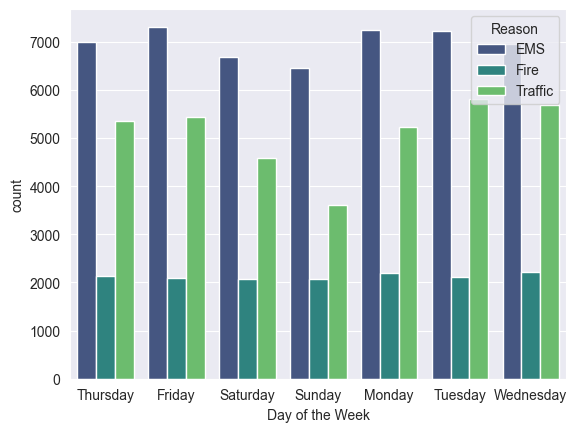

In [43]:
# Now use seaborn to create countplot of the day of the week column with the hue based off of the reason column

sns.countplot(x='Day of the Week', data=df, hue='Reason', palette='viridis')

<Axes: xlabel='Month', ylabel='count'>

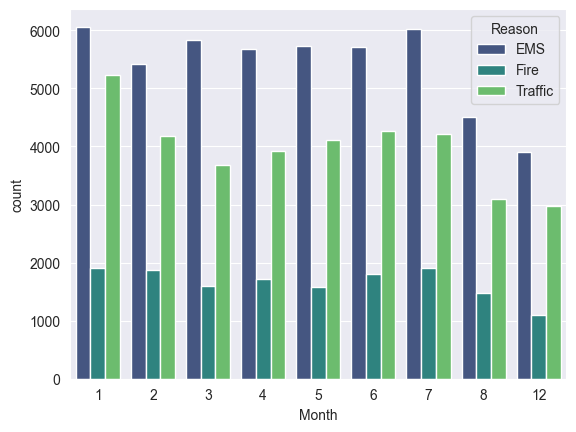

In [45]:
# Do the same for the Month

sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')

In [51]:
# Now create a groupby object called by month , where I groupby the dataframe by the month column and use the count() method for aggregation. Use the head() method on this returned dataframe

byMonth = df.groupby('Month')
byMonth.count().head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of the Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


C:\Users\nchatziminas.BYTE\AppData\Local\Temp\ipykernel_2204\2128078903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='viridis')


<Axes: xlabel='Month', ylabel='count'>

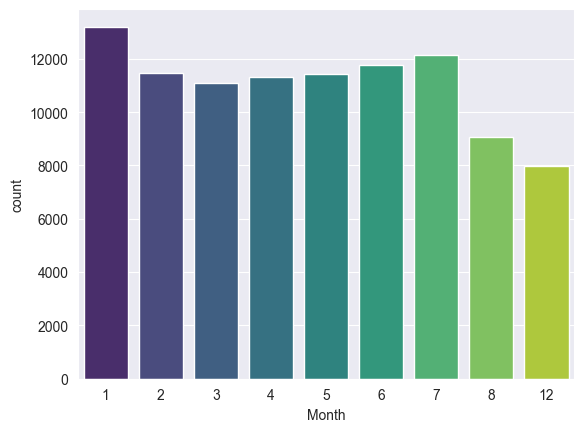

In [58]:
# Now create a simple plot off the dataframe indicating the count of calls per month
sns.countplot(x='Month', data=df, palette='viridis')

In [75]:
# Now see if you can use the seaborn's lmplot() to create a linear fit on the number of calls per month. Keep mind you may need to reset the index of a column

sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

AttributeError: 'DataFrameGroupBy' object has no attribute 'reset_index'

In [82]:
# Create a new column called 'Date' that contains the date from the timeStamp column. You will need to use .apply() method along the .date() method.

import datetime
from datetime import date

df['Date'] = df['timeStamp'].apply(lambda x: x.date())



In [84]:
df.Date

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

<Axes: xlabel='Date'>

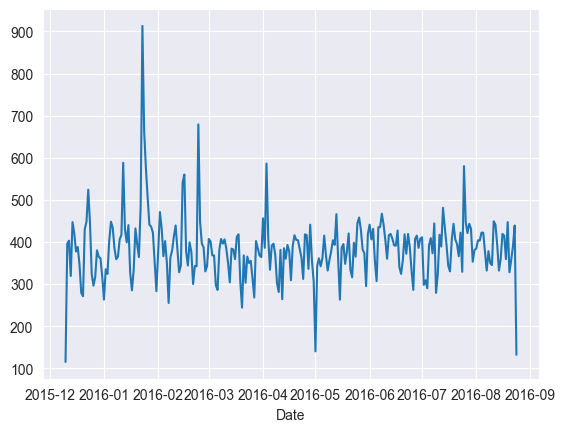

In [99]:
# Now groupby this Date column with the count() aggregate function

df.groupby('Date').count()['lat'].plot()

<Axes: xlabel='Date'>

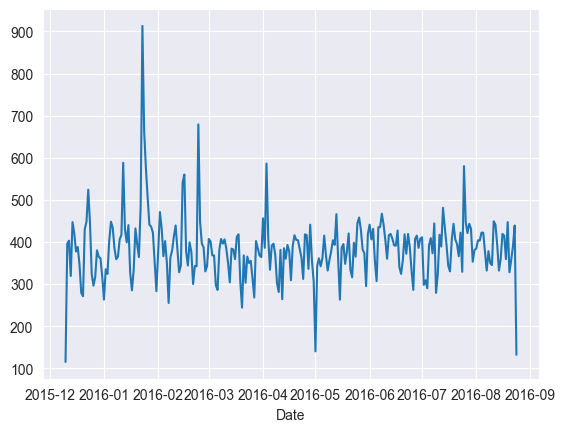

In [108]:
# Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call.

# First Date-traffic

df[df['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot()

<Axes: xlabel='Date'>

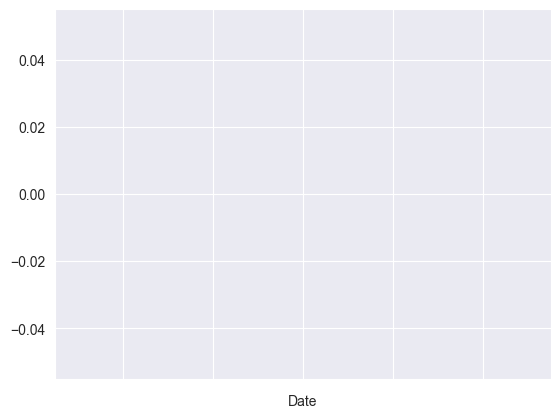

In [110]:
# Second fire

df[df['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot()


<Axes: xlabel='Date'>

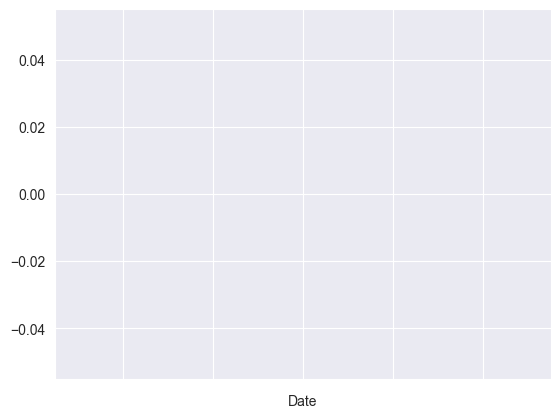

In [112]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot()


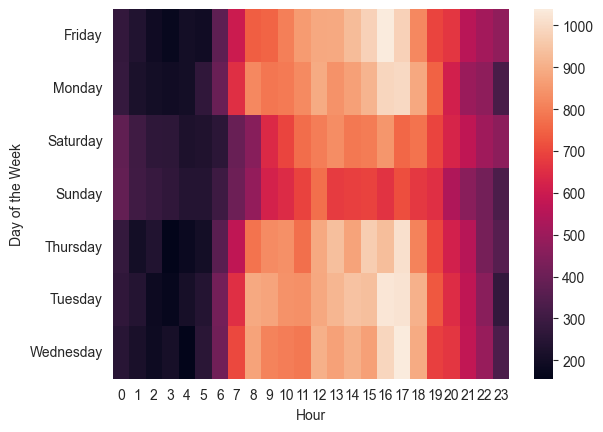

In [138]:
# Now lets move on creating heatamps with seaborn and our data . We will first need to restructure the dataframe so that the columns become The Hours and the Index becomes the Day of the Week.

values_table = df.groupby(['Day of the Week', 'Hour']).count()['Reason']
pivot_table = values_table.unstack(level=1)

heatmap = sns.heatmap(pivot_table)

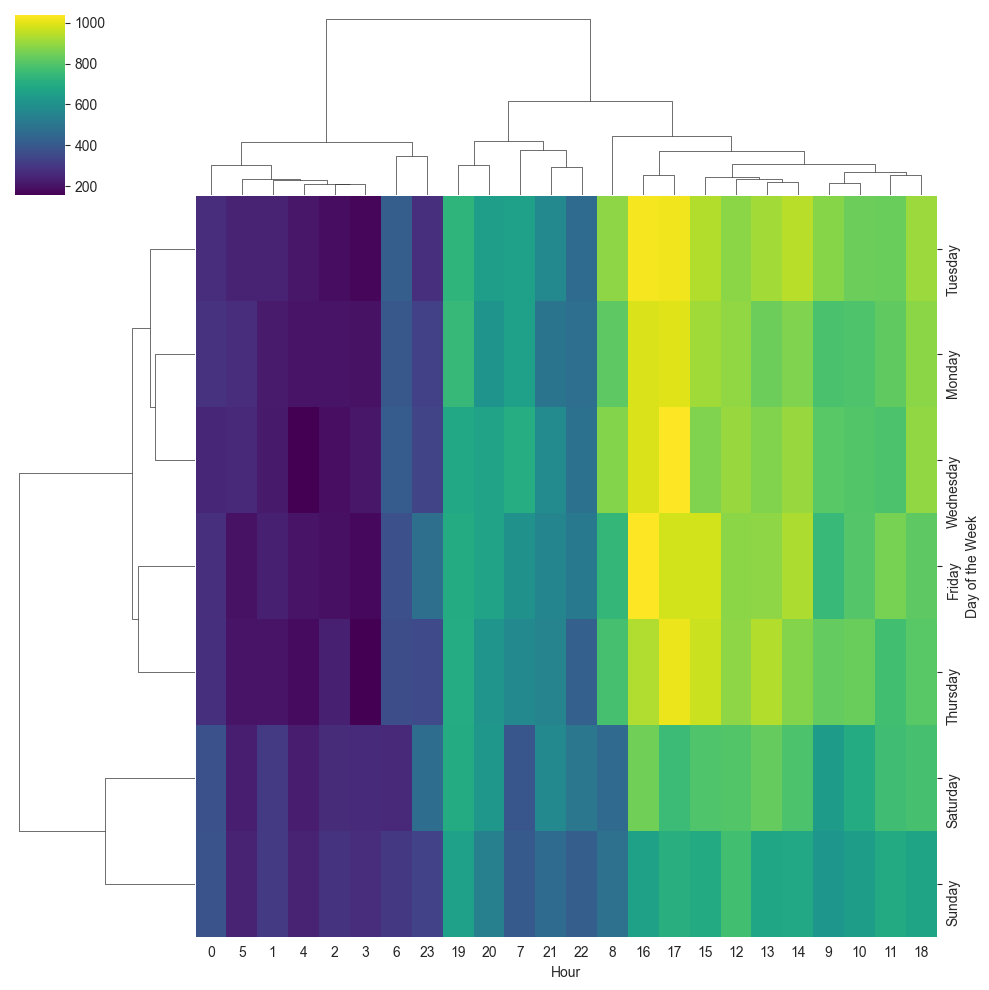

In [142]:
# Now create a clustermap using this dataframe

sns.clustermap(pivot_table, cmap='viridis')

In [148]:
# Now repeat these same plots and operations , for a dataFrame that shows the Month as the column

values_table2 = df.groupby(['Day of the Week', 'Month']).count()['Reason']
pivot_table2 = values_table2.unstack(level=1)

pivot_table2

Month,1,2,3,4,5,6,7,8,12
Day of the Week,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tuesday,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wednesday,1700,1903,1889,1517,1538,2058,1717,1295,1262


<Axes: xlabel='Month', ylabel='Day of the Week'>

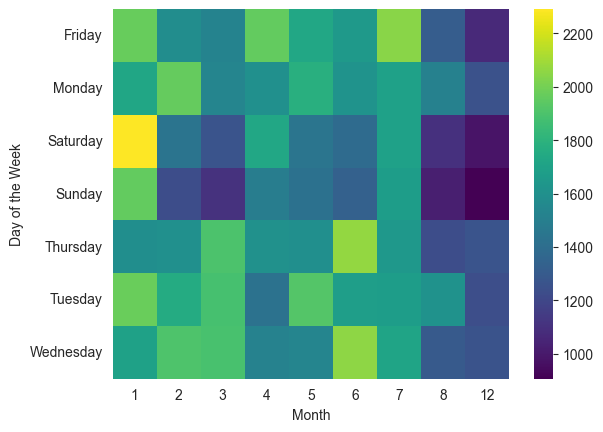

In [150]:
sns.heatmap(pivot_table2, cmap='viridis')

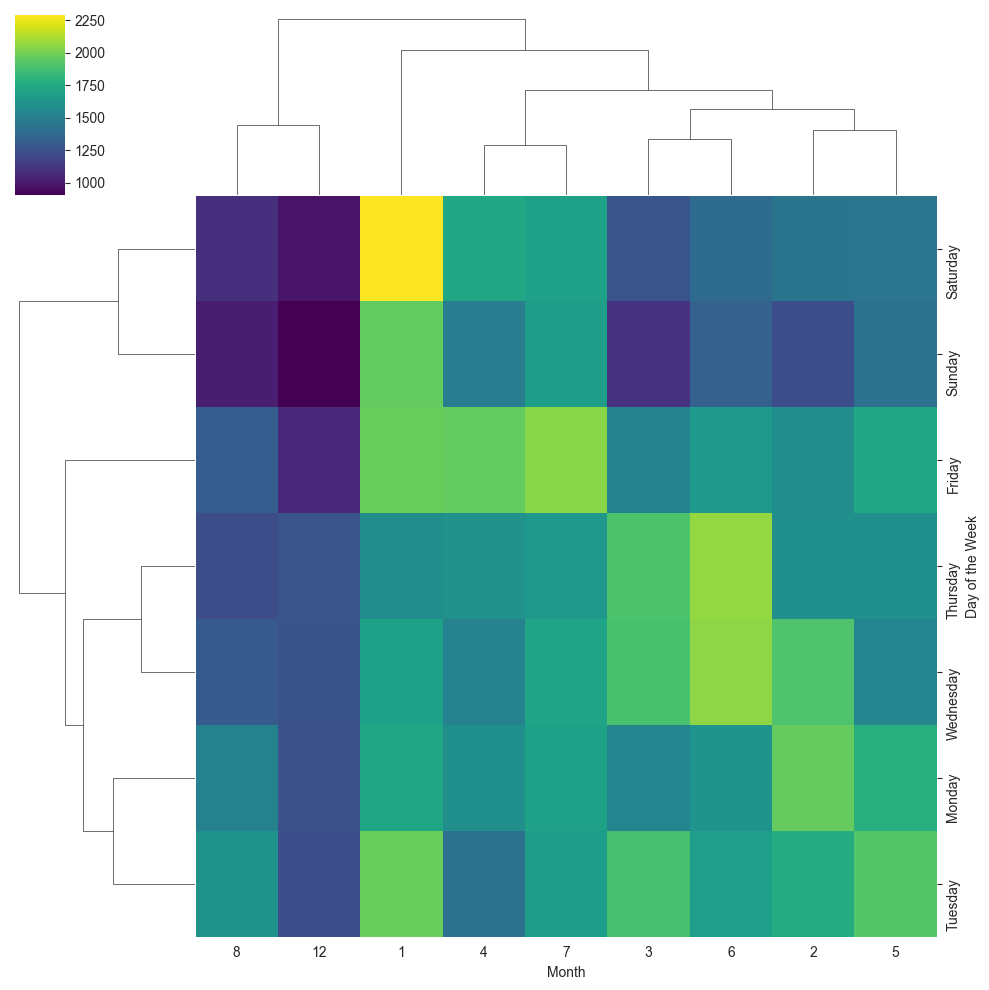

In [153]:
sns.clustermap(pivot_table2, cmap='viridis')